<a href="https://colab.research.google.com/github/rose-n-dan/AlcoholPredictionRegression/blob/master/MOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wczytanie bibliotek

In [3]:
library(ggplot2)
library(plyr)
library(dplyr)

install.packages("devtools")
library(devtools)

install.packages("gridExtra")
library(gridExtra)

install.packages("alluvial")
library(alluvial)

install.packages("extrafont")
library(extrafont)

install.packages("varhandle")
library(varhandle)

install.packages("caret")
library(caret)

devtools::install_github("mrdwab/splitstackshape", ref = "v2.0")
install.packages("splitstackshape")

### GLMNET LIBS ###
library(tidyverse)

library(broom)

install.packages("glmnet")
library(glmnet)
###################

### SVM LIBS ###
install.packages("e1071")
library(e1071)
################

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





✔  checking for file ‘/tmp/RtmpEKIAk6/remotes7d29e3656b/mrdwab-splitstackshape-9d41835/DESCRIPTION’
─  preparing ‘splitstackshape’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘splitstackshape_2.0.0000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Wczytanie danych

Analiza przeprowadzona zostanie na zbiorze danych udostępnionym na witrynie [kaggle](https://www.kaggle.com/uciml/student-alcohol-consumption). Dane
ze zbioru zostały zebrane za pomocą ankiet wypełnianych przez uczniów kursów matematyki
oraz języka portugalskiego w szkole średniej. Są podzielone według kursu, na którego uczniowie
uczęszczali, i zawierają 30 kolumn, które reprezentują atrybuty informujące o płci, wynikach
w nauce, statusie społecznym rodziców, aktywnościach czy relacjach z rówieśnikami każdego z
ankietowanych.

In [0]:
d_mat = read.table("student-mat.csv", sep=",", header=TRUE)
d_por = read.table("student-por.csv", sep=",", header=TRUE)

# Przygotowanie danych

Wstępne przetwarzanie atrybutów będzie odbywać się będzie przed dostarczeniem danych
do modelu regresji wyznaczającej przewidywane spożycie alkoholu. Ponadto, niewykluczone, że
niezbędnym będzie również ograniczenie liczby wykorzystywanych atrybutów poprzez scalenie.

## Scalenie zbiorów danych

Scalono zbiory danych uczniów z języka portugalskiego oraz matematyki. Dodatkowo scalono kolumny `G1`, `G2` i `G3` (reprezentujące oceny z przedmiotu w kolejnych trymestrach) jedną kolumną `avggrades` reprezentującą średnią z trzech trymestrów.

In [5]:
data <- rbind(d_mat, d_por)

data$avggrades = rowMeans(cbind(data$G1, data$G2, data$G3))
data <- data[,-(31:33)]

print(head(data, n=3))

  school sex age address famsize Pstatus Medu Fedu    Mjob    Fjob reason
1     GP   F  18       U     GT3       A    4    4 at_home teacher course
2     GP   F  17       U     GT3       T    1    1 at_home   other course
3     GP   F  15       U     LE3       T    1    1 at_home   other  other
  guardian traveltime studytime failures schoolsup famsup paid activities
1   mother          2         2        0       yes     no   no         no
2   father          1         2        0        no    yes   no         no
3   mother          1         2        3       yes     no  yes         no
  nursery higher internet romantic famrel freetime goout Dalc Walc health
1     yes    yes       no       no      4        3     4    1    1      3
2      no    yes      yes       no      5        3     3    1    1      3
3     yes    yes      yes       no      4        3     2    2    3      3
  absences avggrades
1        6  5.666667
2        4  5.333333
3       10  8.333333


## Przetworzenie typów danych

Zbiór danych zawiera zarówno atrybuty typu liczbowego, jak i słownikowego. Z uwagi na
charakter parametrów przyjmowanych przez wybrane algorytmy regresji, badania przeprowadzone
muszą zostać na zbiorach danych o numerycznych typach atrybutów, dlatego niezbędnym jest
przetworzenie zbioru na wartości numeryczne.


In [0]:
data <- unfactor(data)

schoolUp <- c("GP" = 0, "MS" = 1)
sexUp <- c("F" = 0, "M" = 1)
addressUp <- c("R" = 0, "U" = 1)
famsizeUp <- c("LE3" = 0, "GT3" = 1)
PstatusUp <- c("A" = 0, "T" = 1)

schoolsupUp <- c("no" = 0, "yes" = 1)
famsupUp <- c("no" = 0, "yes" = 1)
paidUp <- c("no" = 0, "yes" = 1)
activitiesUp <- c("no" = 0, "yes" = 1)
nurseryUp <- c("no" = 0, "yes" = 1)
higherUp <- c("no" = 0, "yes" = 1)
internetUp <- c("no" = 0, "yes" = 1)
romanticUp <- c("no" = 0, "yes" = 1)

data$school <- schoolUp[data$school]
data$sex <- sexUp[data$sex]
data$address <- addressUp[data$address]
data$famsize <- famsizeUp[data$famsize]
data$Pstatus <- PstatusUp[data$Pstatus]
data$schoolsup <- schoolsupUp[data$schoolsup]
data$famsup <- famsupUp[data$famsup]
data$paid <- paidUp[data$paid]
data$activities <- activitiesUp[data$activities]
data$nursery <- nurseryUp[data$nursery]
data$higher <- higherUp[data$higher]
data$internet <- internetUp[data$internet]
data$romantic <- romanticUp[data$romantic]

## Rozbicie kolumn

W przypadku parametrów słownikowych o liczbie możliwych wartości `n > 2` wykonano zamianę ich na `n` parametrów typu binarnego.

In [0]:
## Split up the Fjob column
data = splitstackshape::concat.split.expanded(data, "Fjob", "-", type = "character", 
                      fill = 0, drop = TRUE)

## Split up the Mjob column
data = splitstackshape::concat.split.expanded(data, "Mjob", "-", type = "character", 
                      fill = 0, drop = TRUE)

## Split up the reason column
data = splitstackshape::concat.split.expanded(data, "reason", "-", type = "character", 
                      fill = 0, drop = TRUE)

## Split up the guardian column
data = splitstackshape::concat.split.expanded(data, "guardian", "-", type = "character", 
                      fill = 0, drop = TRUE)
                      

## Sprawdzenie kompletności danych

Wyświetlono rozmiar niekomplentych danych.

In [8]:
missing = data[!complete.cases(data),]

dim(missing)

[1]  0 44

Wszystkie dane są kompletne.

## Podział danych

Dane podzielono na dwa zbiory reprezentujące dwa osobne zadania, czyli prognoza:

*   spożycia w dni powszednie
*   spożycia w dni weekendy

Każdy z nich zawiera zestaw zmiennych objaśniających. Ostatnią kolumną zbioru danych jest zmienna prognozowana.
Żadna ze zmiennych prognozowanych w którymkolwiek z zadań nie należy do zmiennych objaśniających w innym zadaniu. 



In [9]:
str(data)

'data.frame':	1044 obs. of  44 variables:
 $ school           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sex              : num  0 0 0 0 0 1 1 0 1 1 ...
 $ age              : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ famsize          : num  1 1 0 1 1 0 0 1 0 1 ...
 $ Pstatus          : num  0 1 1 1 1 1 1 0 0 1 ...
 $ Medu             : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu             : int  4 1 1 2 3 3 2 4 2 4 ...
 $ traveltime       : int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime        : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures         : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup        : num  1 0 1 0 0 0 0 1 0 0 ...
 $ famsup           : num  0 1 0 1 1 1 0 1 1 1 ...
 $ paid             : num  0 0 1 1 1 1 0 0 1 1 ...
 $ activities       : num  0 0 0 1 0 1 0 0 0 1 ...
 $ nursery          : num  1 0 1 1 1 1 1 1 1 1 ...
 $ higher           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ internet         : num  0 1 1 1 0 1 1 0 1 1 ...
 $ romantic         : num  0 0

In [10]:
# change columns order so input data is separated from output
data_wdays <- subset(data, select=c(1:22,25:44,23))
head(data_wdays, n=3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,⋯,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,Dalc
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,0,18,1,1,0,4,4,2,2,⋯,0,0,1,0,0,0,0,1,0,1
2,0,0,17,1,1,1,1,1,1,2,⋯,0,0,1,0,0,0,1,0,0,1
3,0,0,15,1,0,1,1,1,1,2,⋯,0,0,0,0,1,0,0,1,0,2


In [11]:
# change columns order so input data is separated from output
data_wend <- subset(data, select=c(1:22,25:44,24))
head(data_wend, n=3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,⋯,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,Walc
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,0,18,1,1,0,4,4,2,2,⋯,0,0,1,0,0,0,0,1,0,1
2,0,0,17,1,1,1,1,1,1,2,⋯,0,0,1,0,0,0,1,0,0,1
3,0,0,15,1,0,1,1,1,1,2,⋯,0,0,0,0,1,0,0,1,0,3


# Modele

Celem projektu jest wnikliwa i szeroko zakrojona analiza działań zbudowanych modeli regresji w zadaniu przewidywania spożycia alkoholu przez studentów. Za pomocą dostępnych w R narzędzi stworzone zostaną odpowiednie modele pozwalające na przewidzenie ilości spożywanego alkoholu na podstawie wartości atrybutów opisujących każdego z uczniów. W wyniku przeprowadzonych eksperymentów stwierdzone zostanie, który ze zbudowanych modeli daje najlepsze wyniki w tak zdefiniowanym problemie.

Predykcja przeprowadzona zostanie w dwóch częściach: predykcji spożycia weekendowego oraz tygodniowego (bez
weekendu). W każdym z tych zadań dane o spożyciu alkoholu w jakimkolwiek z dwóch trybów nie będą uwzględniane jako dane wejściowe. Na przykład dane o spożyciu w weekend nie będą uwzględniane w budowaniu modelu predykcji spożycia tygodniowego.

### Definiowanie funkcji pomocniczych


Pierwszą z funkcji pomocniczych jest funkcja `rmse` obliczająca pierwiastek błędu średniokwadratowego dla danej predykcji. Średnia kwadratowa błędów ( RMSE ) lub piewiastkiem błędu średniokwadratowego ( MSE ) jest często stosowanym miernikiem różnic między wartościami (próbki lub wartości populacyjnych) przewidywanymi przez model lub estymatora a wartościami obserwowanymi. RMSE reprezentuje pierwiastek kwadratowy z drugiego próbnego momentu różnic między wartościami przewidywanymi a wartościami obserwowanymi lub średnią kwadratową tych różnic.

In [0]:
rmse <- function(Y, predictedY) {
  error <- predictedY - Y

  rmse <- sqrt(mean(error^2))

  return(rmse)
}

Kolejna z funkcji pomocniczych, 'confusion_matrix', używana jest do generowania macierzy pomyłek dla predykcji poszczególnych modeli. Każdy z wierszy macierzy reprezentuje obiekty z klasami predykowanej, natomiast każda z kolumn - obiekty rzeczywistej klasy. Macierz błędów wykorzystywana jest przede wszystkim w ocenie jakości klasyfikacji binarnej, więc aby zastosowanie macierzy pomyłek do oceny jakości modelu regresji było możliwe, należy najpierw zaokrąglić wynik dostarczany z modelu. Klasa rzeczywista ma pięć dyskretnych wartości, także będzie można określić, czy zaokrąglony wynik został sklasyfikowany poprawnie.

Dodatkowo, funkcja, na podstawie wygenerowanej macierzy, wyznacza wskaźniki jakości rozwiązania, jak:
* dokładność
* czułość
* precyzja
* specyficzność


In [0]:
confusion_matrix <- function(Y, predictedY) {
  predictedY <- round(predictedY, digits=0)

  predictedY[predictedY < 1] <- 1
  predictedY[predictedY > 5] <- 5

  confusionMatrix(factor(Y, levels=1:5), factor(predictedY, levels=1:5))
}

Kolejną funkcją pomocniczą jest funkcja `coefficient_of_determination`, wyznaczająca współczynik determinancji. Współczynnik ten informuje o tym, jaka część wariancji zmiennej objaśnianej w próbie pokrywa się z korelacjami
ze zmiennymi zawartymi w modelu. Jest on więc miarą stopnia, w jakim model pasuje do próby. Współczynnik determinacji przyjmuje wartości z przedziału [0;1], a dopasowanie modelu jest tym lepsze, im wartość `R^2`
jest bliższa jedności.

In [0]:
coefficient_of_determination <- function(Y, predictedY) {
  mean <- mean(Y)

  numerator <- sum((predictedY - Y) ^ 2)
  denominator <- sum((Y - mean) ^ 2)

  return(numerator / denominator)
}

Ostatnią z funkcji pomocniczych jest funkcja `coefficient_of_variation`. Wyznacza ona współczynnik zmienności resztowej, który informuje o tym, jaką część wartości średniej zmiennej objaśnianej stanowi odchylenie standardowe składnika resztowego, czyli w jakim stopniu na zmienną objaśnianą mają wpływ czynniki losowe.

In [0]:
coefficient_of_variation <- function(Y, predictedY, num_col) {
  mean <- mean(Y)

  error <- predictedY - Y
  deviation <- sqrt(sum(error ^ 2) / (NROW(Y) - num_col - 1))
  
  return(deviation / mean)
}

Funkcja `evaluate_model` drukuje na ekran wyniki wszystkich opisanych funkcji pomocniczych.

In [0]:
evaluate_model <- function(Y, predictedY, num_col) {
  print(paste0("RMSE: ", rmse(Y, predictedY)))
  print(confusion_matrix(Y, predictedY))
  print(paste0("Coefficient of determination: ", coefficient_of_determination(Y, predictedY)))
  print(paste0("Coefficient of variation: ", coefficient_of_variation(Y, predictedY, num_col)))
}

### Przewidywanie spożycia w dni powszednie



#### Regresja liniowa:

Regresja liniowa (ang. Linear regression) to metoda oparta o liniowe kombinacje zmiennych i parametrów dopasowujących model do danych, jeden z najpopularniejszych typów regresji. Budowanie modelu regresji liniowej nie wykorzystuje żadnych parametrów.


In [17]:
linear_reg_model_wdays <- lm(Dalc ~ ., data=data_wdays[,1:43])
summary(linear_reg_model_wdays)


Call:
lm(formula = Dalc ~ ., data = data_wdays[, 1:43])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1805 -0.4875 -0.1639  0.2766  3.3756 

Coefficients: (4 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.023786   0.546644   0.044  0.96530    
school             0.016368   0.068752   0.238  0.81187    
sex                0.430517   0.056831   7.575 8.11e-14 ***
age                0.061518   0.024120   2.550  0.01091 *  
address           -0.110767   0.064337  -1.722  0.08544 .  
famsize           -0.140283   0.058046  -2.417  0.01584 *  
Pstatus            0.017179   0.083707   0.205  0.83744    
Medu               0.062076   0.036529   1.699  0.08956 .  
Fedu              -0.019995   0.032568  -0.614  0.53938    
traveltime         0.078046   0.038566   2.024  0.04327 *  
studytime         -0.063166   0.033494  -1.886  0.05960 .  
failures          -0.001700   0.045336  -0.038  0.97009    
schoolsup    

In [18]:
predictedY <- predict(linear_reg_model_wdays)
Y <- data_wdays$Dalc

evaluate_model(Y, predictedY, ncol(data_wdays))

[1] "RMSE: 0.79117355504761"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 481 243   3   0   0
         2  64 126   6   0   0
         3  13  52   4   0   0
         4   3  21   2   0   0
         5   0  20   6   0   0

Overall Statistics
                                          
               Accuracy : 0.5852          
                 95% CI : (0.5547, 0.6153)
    No Information Rate : 0.5374          
    P-Value [Acc > NIR] : 0.001031        
                                          
                  Kappa : 0.2339          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.8574   0.2727 0.190476       NA       NA
Specificity            0.4907   0.8797 0.936461   0.9751   0.9751
Pos Pred Value         0.6616   0.6429 0.057971       NA       NA
Neg Pred Value         0.7476   0.6038

#### Regresja logistyczna

Regresja logistyczna (ang. Logistic Regression) jest uogólnionym modelem liniowym, w którym używa się funkcji logit jako funkcji wiążącej. Funkcja logit jest logarytmem szansy, jest to metoda bezparametrowa. Wynik predykcji należał będzie do przedziału [0, 1], zostanie więc przeskalowany na przedział [1, 5].


In [19]:
logistic_reg_model_wdays <- glm(Dalc ~ ., data=data_wdays[,1:43])
summary(logistic_reg_model_wdays)


Call:
glm(formula = Dalc ~ ., data = data_wdays[, 1:43])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1805  -0.4875  -0.1639   0.2766   3.3756  

Coefficients: (4 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.023786   0.546644   0.044  0.96530    
school             0.016368   0.068752   0.238  0.81187    
sex                0.430517   0.056831   7.575 8.11e-14 ***
age                0.061518   0.024120   2.550  0.01091 *  
address           -0.110767   0.064337  -1.722  0.08544 .  
famsize           -0.140283   0.058046  -2.417  0.01584 *  
Pstatus            0.017179   0.083707   0.205  0.83744    
Medu               0.062076   0.036529   1.699  0.08956 .  
Fedu              -0.019995   0.032568  -0.614  0.53938    
traveltime         0.078046   0.038566   2.024  0.04327 *  
studytime         -0.063166   0.033494  -1.886  0.05960 .  
failures          -0.001700   0.045336  -0.038  0.97

In [20]:
predictedY <- predict(logistic_reg_model_wdays)
Y <- data_wdays$Dalc

evaluate_model(Y, predictedY, ncol(data_wdays))

[1] "RMSE: 0.79117355504761"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 481 243   3   0   0
         2  64 126   6   0   0
         3  13  52   4   0   0
         4   3  21   2   0   0
         5   0  20   6   0   0

Overall Statistics
                                          
               Accuracy : 0.5852          
                 95% CI : (0.5547, 0.6153)
    No Information Rate : 0.5374          
    P-Value [Acc > NIR] : 0.001031        
                                          
                  Kappa : 0.2339          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.8574   0.2727 0.190476       NA       NA
Specificity            0.4907   0.8797 0.936461   0.9751   0.9751
Pos Pred Value         0.6616   0.6429 0.057971       NA       NA
Neg Pred Value         0.7476   0.6038

#### Regresja grzbietowa

Regresja grzbietowa (ang. Ridge Regression) jest metodą regularyzacji szczególnie użyteczną w przypadku danych zawierających wiele liniowo zależnych zmiennych towarzyszących. Z tego powodu dobrze radzi sobie w przypadkach potencjalnie prowadzących do overfittingu z powodu zbyt dużej liczby parametrów w stosunku do liczby przykładów w zbiorze danych. Potencjalnym parametrem w tej metodzie jest mnożnik Lagrange’a λ. Jendakże pakiet R posiada zaimplementowaną metodę automatycznego dobierania parametru λ na podstawie metody Cule, która dobiera optymalną wartość parametru. Dla porównania przeprowadzony zostanie także eksperyment z dobraną arbitralnie wartością parametru λ.

Konwersja danych do formatu wymaganego przez funkcję `glmnet`

In [0]:
y_wdays <- data_wdays$Dalc
x_wdays <- data_wdays[,1:42] %>% data.matrix()

lambdas <- 10^seq(3, -2, by = -.1)

In [22]:
ridge_reg_model_wdays <- cv.glmnet(x_wdays, y_wdays, alpha=0, lambda=lambdas)
summary(ridge_reg_model_wdays)

opt_lambda <- ridge_reg_model_wdays$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     51     -none- numeric  
cvm        51     -none- numeric  
cvsd       51     -none- numeric  
cvup       51     -none- numeric  
cvlo       51     -none- numeric  
nzero      51     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.1584893


In [23]:
predictedY <- predict(ridge_reg_model_wdays, newx=x_wdays, s=opt_lambda)
Y <- data_wdays$Dalc

evaluate_model(Y, predictedY, ncol(data_wdays))

[1] "RMSE: 0.793616755175742"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 485 239   3   0   0
         2  65 127   4   0   0
         3  12  55   2   0   0
         4   3  22   1   0   0
         5   0  20   6   0   0

Overall Statistics
                                          
               Accuracy : 0.5881          
                 95% CI : (0.5576, 0.6182)
    No Information Rate : 0.5412          
    P-Value [Acc > NIR] : 0.001259        
                                          
                  Kappa : 0.2357          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.8584   0.2743 0.125000       NA       NA
Specificity            0.4948   0.8812 0.934825   0.9751   0.9751
Pos Pred Value         0.6671   0.6480 0.028986       NA       NA
Neg Pred Value         0.7476   0.603

#### Regresja Lasso

Regresja Lasso (ang. Lasso Regression) jest metodą podobną do regresji grzbietowej oraz posiada takie same parametry (więc eksperymenty przeprowadzone z użyciem tej metody będą takie same). W przeciwieństwie do regresji grzbietowej, Lasso dokonuje selekcji zmiennych towarzyszących przez co zwiększa interpretowalność modelu.

In [24]:
lasso_reg_model_wdays <- cv.glmnet(x_wdays, y_wdays, alpha=1, lambda=lambdas)
summary(lasso_reg_model_wdays)

opt_lambda <- lasso_reg_model_wdays$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     51     -none- numeric  
cvm        51     -none- numeric  
cvsd       51     -none- numeric  
cvup       51     -none- numeric  
cvlo       51     -none- numeric  
nzero      51     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.01


In [25]:
predictedY <- predict(lasso_reg_model_wdays, newx=x_wdays, s=opt_lambda)
Y <- data_wdays$Dalc

evaluate_model(Y, predictedY, ncol(data_wdays))

[1] "RMSE: 0.793299707414717"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 486 238   3   0   0
         2  66 126   4   0   0
         3  13  54   2   0   0
         4   2  22   2   0   0
         5   0  20   6   0   0

Overall Statistics
                                          
               Accuracy : 0.5881          
                 95% CI : (0.5576, 0.6182)
    No Information Rate : 0.5431          
    P-Value [Acc > NIR] : 0.001882        
                                          
                  Kappa : 0.2344          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.8571   0.2739 0.117647       NA       NA
Specificity            0.4948   0.8801 0.934761   0.9751   0.9751
Pos Pred Value         0.6685   0.6429 0.028986       NA       NA
Neg Pred Value         0.7445   0.606

#### Regresja Elastic Net

Regresja Elastic Net (ang. Elastic Net Regression) jest kombinacją liniową dwóch poprzednich metod: regresji grzbietowej oraz Lasso. Parametrem, który będzie tu regulowany jest α - przyjmuje on wartości od 0 do 1 i mówi on o tym jak duży udział w modelu będzie miała każda ze składowych: grzbietowa oraz Lasso.

Testy dla trzech wartości parametru alpha: 0.25, 0.5 i 0.75.

In [26]:
elastic_net_025_reg_model_wdays <- cv.glmnet(x_wdays, y_wdays, alpha=0.25, lambda=lambdas)
summary(elastic_net_025_reg_model_wdays)

opt_lambda <- elastic_net_025_reg_model_wdays$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     51     -none- numeric  
cvm        51     -none- numeric  
cvsd       51     -none- numeric  
cvup       51     -none- numeric  
cvlo       51     -none- numeric  
nzero      51     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.03981072


In [27]:
predictedY <- predict(elastic_net_025_reg_model_wdays, newx=x_wdays, s=opt_lambda)
Y <- data_wdays$Dalc

evaluate_model(Y, predictedY, ncol(data_wdays))

[1] "RMSE: 0.793938140454897"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 485 239   3   0   0
         2  67 126   3   0   0
         3  13  54   2   0   0
         4   2  22   2   0   0
         5   0  20   6   0   0

Overall Statistics
                                          
               Accuracy : 0.5872          
                 95% CI : (0.5566, 0.6172)
    No Information Rate : 0.5431          
    P-Value [Acc > NIR] : 0.002293        
                                          
                  Kappa : 0.2325          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.8554   0.2733 0.125000       NA       NA
Specificity            0.4927   0.8799 0.934825   0.9751   0.9751
Pos Pred Value         0.6671   0.6429 0.028986       NA       NA
Neg Pred Value         0.7413   0.605

In [28]:
elastic_net_05_reg_model_wdays <- cv.glmnet(x_wdays, y_wdays, alpha=0.5, lamda=lambdas)
summary(elastic_net_05_reg_model_wdays)

opt_lambda <- elastic_net_05_reg_model_wdays$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     70     -none- numeric  
cvm        70     -none- numeric  
cvsd       70     -none- numeric  
cvup       70     -none- numeric  
cvlo       70     -none- numeric  
nzero      70     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.01937914


In [29]:
predictedY <- predict(ridge_reg_model_wdays, newx=x_wdays, s=opt_lambda)
Y <- data_wdays$Dalc

evaluate_model(Y, predictedY, ncol(data_wdays))

[1] "RMSE: 0.791228730817517"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 485 239   3   0   0
         2  63 127   6   0   0
         3  13  52   4   0   0
         4   3  21   2   0   0
         5   0  20   6   0   0

Overall Statistics
                                          
               Accuracy : 0.59            
                 95% CI : (0.5595, 0.6201)
    No Information Rate : 0.5402          
    P-Value [Acc > NIR] : 0.0006676       
                                          
                  Kappa : 0.2407          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.8599   0.2767 0.190476       NA       NA
Specificity            0.4958   0.8821 0.936461   0.9751   0.9751
Pos Pred Value         0.6671   0.6480 0.057971       NA       NA
Neg Pred Value         0.7508   0.608

In [30]:
elastic_net_075_reg_model_wdays <- cv.glmnet(x_wdays, y_wdays, alpha=0.75, lamda=lambdas)
summary(elastic_net_075_reg_model_wdays)

opt_lambda <- elastic_net_075_reg_model_wdays$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     69     -none- numeric  
cvm        69     -none- numeric  
cvsd       69     -none- numeric  
cvup       69     -none- numeric  
cvlo       69     -none- numeric  
nzero      69     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.01417906


In [31]:
predictedY <- predict(ridge_reg_model_wdays, newx=x_wdays, s=opt_lambda)
Y <- data_wdays$Dalc

evaluate_model(Y, predictedY, ncol(data_wdays))

[1] "RMSE: 0.791203795377692"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 483 241   3   0   0
         2  63 127   6   0   0
         3  13  52   4   0   0
         4   3  21   2   0   0
         5   0  20   6   0   0

Overall Statistics
                                          
               Accuracy : 0.5881          
                 95% CI : (0.5576, 0.6182)
    No Information Rate : 0.5383          
    P-Value [Acc > NIR] : 0.0006708       
                                          
                  Kappa : 0.2385          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.8594   0.2755 0.190476       NA       NA
Specificity            0.4938   0.8816 0.936461   0.9751   0.9751
Pos Pred Value         0.6644   0.6480 0.057971       NA       NA
Neg Pred Value         0.7508   0.606

#### Regresja Wektorów Nośnych

Regresja Wektorów Nośnych (ang. Support Vector Regression - SVR) jest to metoda regresji, która nie minimalizuje błędu średniokwadratowego każdego z przypadków, a bada czy leży w określonych przez parametr `epsilon` granicach. Każdy punkt nieleżący w tych granicach generuje dodatkową karę. W eksperymentach użyte zostaną dwa jądra: liniowe oraz radialnej funkcji bazowej.

Za pomocą funkcji `tune` dopasowano lokalnie optymalne wartości parametrów modelu regresji wektorów nośnych: `epsilon` i `cost`.

Dopasowano model korzystający z jądra liniowego.

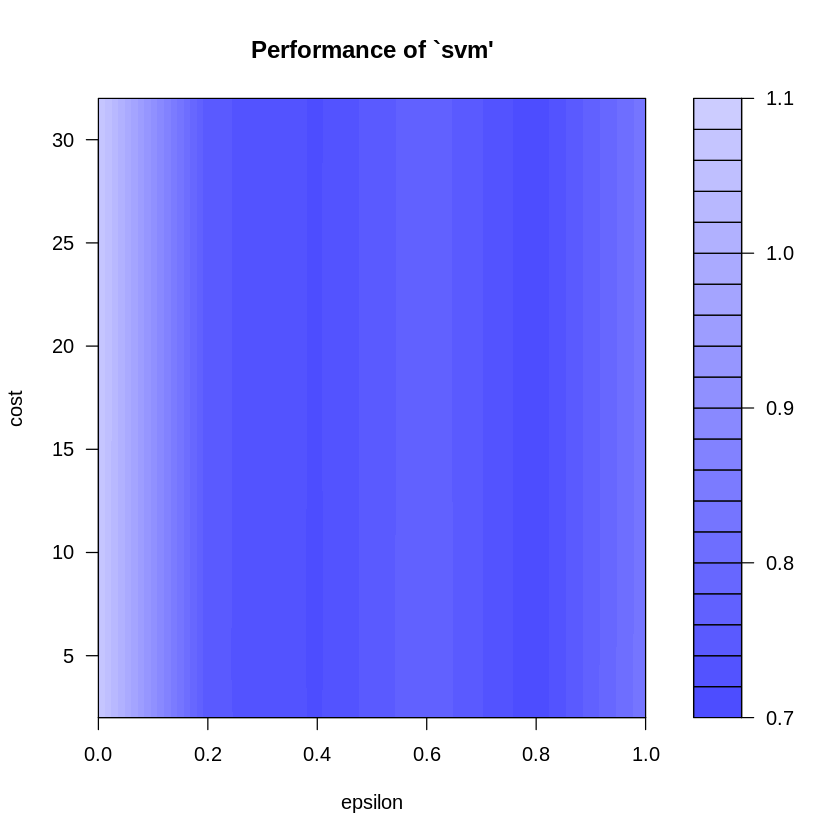

In [32]:
tune_results <- tune(svm, x_wdays, y_wdays, svm = "regression", kernel="linear",
                     ranges = list(epsilon = seq(0, 1, 0.2), cost = 2^(1:5)))

plot(tune_results)

In [33]:
svrl_model_wdays <- tune_results$best.model
summary(svrl_model_wdays)


Call:
best.tune(method = svm, train.x = x_wdays, train.y = y_wdays, ranges = list(epsilon = seq(0, 
    1, 0.2), cost = 2^(1:5)), svm = "regression", kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  2 
      gamma:  0.02380952 
    epsilon:  0.8 


Number of Support Vectors:  269






In [34]:
predictedY <- predict(svrl_model_wdays, x=x_wdays)
Y <- data_wdays$Dalc

evaluate_model(Y, predictedY, ncol(data_wdays))

[1] "RMSE: 0.818595449972803"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 354 370   3   0   0
         2  48 148   0   0   0
         3   4  65   0   0   0
         4   1  25   0   0   0
         5   0  26   0   0   0

Overall Statistics
                                          
               Accuracy : 0.4808          
                 95% CI : (0.4501, 0.5116)
    No Information Rate : 0.6073          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1549          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.8698   0.2334 0.000000       NA       NA
Specificity            0.4144   0.8829 0.933718   0.9751   0.9751
Pos Pred Value         0.4869   0.7551 0.000000       NA       NA
Neg Pred Value         0.8328   0.426

Dopasowano model korzystający o radialnej funkcji bazowej.


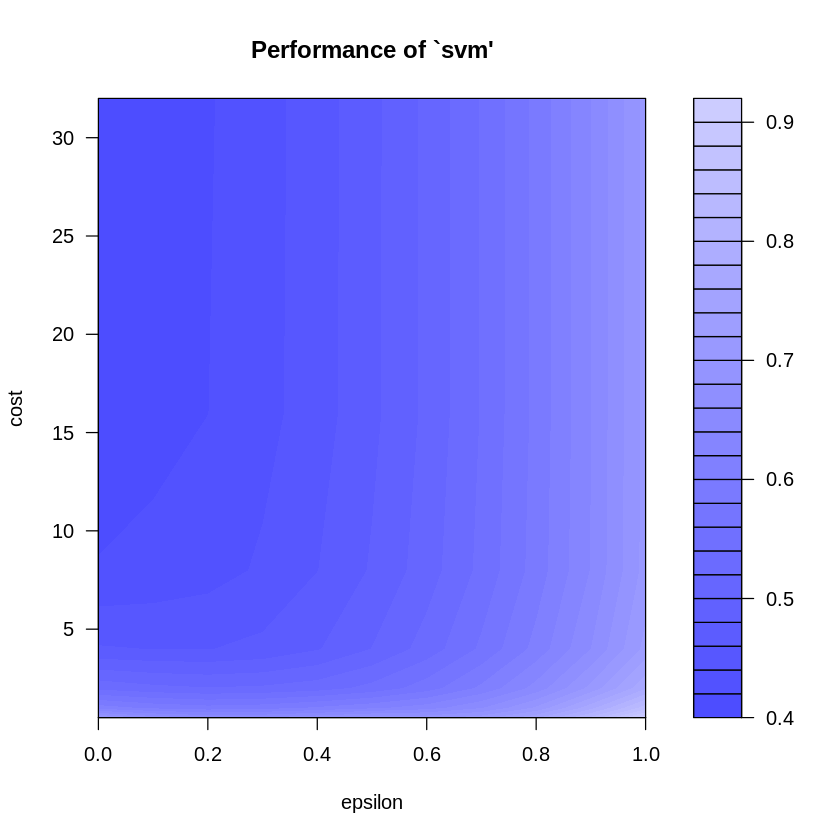

In [35]:
tune_results <- tune(svm, x_wdays, y_wdays, svm = "regression", kernel="radial",
                     ranges = list(epsilon = seq(0, 1.0, 0.1), cost = 2^(-1:5)))

plot(tune_results)

In [36]:
svrr_model_wdays <- tune_results$best.model
summary(svrr_model_wdays)


Call:
best.tune(method = svm, train.x = x_wdays, train.y = y_wdays, ranges = list(epsilon = seq(0, 
    1, 0.1), cost = 2^(-1:5)), svm = "regression", kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  32 
      gamma:  0.02380952 
    epsilon:  0 


Number of Support Vectors:  1042






In [37]:
predictedY <- predict(svrr_model_wdays, x=x_wdays)
Y <- data_wdays$Dalc

evaluate_model(Y, predictedY, ncol(data_wdays))

[1] "RMSE: 0.000321523566071424"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 727   0   0   0   0
         2   0 196   0   0   0
         3   0   0  69   0   0
         4   0   0   0  26   0
         5   0   0   0   0  26

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9965, 1)
    No Information Rate : 0.6964     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            1.0000   1.0000  1.00000   1.0000   1.0000
Specificity            1.0000   1.0000  1.00000   1.0000   1.0000
Pos Pred Value         1.0000   1.0000  1.00000   1.0000   1.0000
Neg Pred Value         1.0000   1.0000  1.00000   1.0000   1.0000
Prevalence   

### Przewidywanie spożycia weekendowego


Na tym etapie powtórzone zostaną operacje wykonane uprzednio w celu predykcji spożycia alkoholu w ciągu tygodnia roboczego, tym razem w celu predukcji spożycia w dni weekendowe.

#### Regresja liniowa:

In [38]:
linear_reg_model_wend <- lm(Walc ~ ., data=data_wend[,1:43])
summary(linear_reg_model_wend)


Call:
lm(formula = Walc ~ ., data = data_wend[, 1:43])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.7565 -0.1234  0.7109  3.0695 

Coefficients: (4 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.248918   0.712454   0.349 0.726877    
school            -0.068565   0.089607  -0.765 0.444344    
sex                0.613484   0.074070   8.283 3.82e-16 ***
age                0.057688   0.031437   1.835 0.066791 .  
address           -0.129840   0.083853  -1.548 0.121832    
famsize           -0.192496   0.075653  -2.544 0.011093 *  
Pstatus            0.099042   0.109097   0.908 0.364188    
Medu              -0.084056   0.047609  -1.766 0.077779 .  
Fedu               0.095630   0.042446   2.253 0.024477 *  
traveltime         0.055952   0.050264   1.113 0.265904    
studytime         -0.175039   0.043654  -4.010 6.53e-05 ***
failures           0.028970   0.059088   0.490 0.624043    
schoolsup     

In [39]:
predictedY <- predict(linear_reg_model_wend)
Y <- data_wend$Walc

evaluate_model(Y, predictedY, ncol(data_wend))

[1] "RMSE: 1.03115533577928"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 106 242  46   4   0
         2  37 128  66   4   0
         3  19  79  97   5   0
         4   1  30  79  28   0
         5   0   5  37  30   1

Overall Statistics
                                         
               Accuracy : 0.3448         
                 95% CI : (0.316, 0.3745)
    No Information Rate : 0.4636         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1463         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4  Class: 5
Sensitivity            0.6503   0.2645  0.29846  0.39437 1.0000000
Specificity            0.6686   0.8089  0.85675  0.88695 0.9309684
Pos Pred Value         0.2663   0.5447  0.48500  0.20290 0.0136986
Neg Pred Value         0.9118   0.5600  0.7

#### Regresja logistyczna

In [40]:
logistic_reg_model_wend <- glm(Walc ~ ., data=data_wend[,1:43])
summary(logistic_reg_model_wend)


Call:
glm(formula = Walc ~ ., data = data_wend[, 1:43])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4474  -0.7565  -0.1234   0.7109   3.0695  

Coefficients: (4 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.248918   0.712454   0.349 0.726877    
school            -0.068565   0.089607  -0.765 0.444344    
sex                0.613484   0.074070   8.283 3.82e-16 ***
age                0.057688   0.031437   1.835 0.066791 .  
address           -0.129840   0.083853  -1.548 0.121832    
famsize           -0.192496   0.075653  -2.544 0.011093 *  
Pstatus            0.099042   0.109097   0.908 0.364188    
Medu              -0.084056   0.047609  -1.766 0.077779 .  
Fedu               0.095630   0.042446   2.253 0.024477 *  
traveltime         0.055952   0.050264   1.113 0.265904    
studytime         -0.175039   0.043654  -4.010 6.53e-05 ***
failures           0.028970   0.059088   0.490 0.6240

In [41]:
predictedY <- predict(logistic_reg_model_wend)
Y <- data_wend$Walc

evaluate_model(Y, predictedY, ncol(data_wend))

[1] "RMSE: 1.03115533577928"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 106 242  46   4   0
         2  37 128  66   4   0
         3  19  79  97   5   0
         4   1  30  79  28   0
         5   0   5  37  30   1

Overall Statistics
                                         
               Accuracy : 0.3448         
                 95% CI : (0.316, 0.3745)
    No Information Rate : 0.4636         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1463         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4  Class: 5
Sensitivity            0.6503   0.2645  0.29846  0.39437 1.0000000
Specificity            0.6686   0.8089  0.85675  0.88695 0.9309684
Pos Pred Value         0.2663   0.5447  0.48500  0.20290 0.0136986
Neg Pred Value         0.9118   0.5600  0.7

#### Regresja grzbietowa

In [0]:
y_wend <- data_wend$Walc
x_wend <- data_wend[,1:42] %>% data.matrix()

lambdas <- 10^seq(3, -2, by = -.1)

In [43]:
ridge_reg_model_wend <- cv.glmnet(x_wend, y_wend, alpha=0, lambda=lambdas)
summary(ridge_reg_model_wend)

opt_lambda <- ridge_reg_model_wend$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     51     -none- numeric  
cvm        51     -none- numeric  
cvsd       51     -none- numeric  
cvup       51     -none- numeric  
cvlo       51     -none- numeric  
nzero      51     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.1258925


In [44]:
predictedY <- predict(ridge_reg_model_wend, newx=x_wdays, s=opt_lambda)
Y <- data_wend$Walc

evaluate_model(Y, predictedY, ncol(data_wend))

[1] "RMSE: 1.03354650078889"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1  95 257  44   2   0
         2  29 140  64   2   0
         3  13  90  95   2   0
         4   1  31  85  21   0
         5   0   5  43  25   0

Overall Statistics
                                          
               Accuracy : 0.3362          
                 95% CI : (0.3076, 0.3658)
    No Information Rate : 0.501           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1374          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.6884   0.2677   0.2870  0.40385       NA
Specificity            0.6656   0.8177   0.8527  0.88206  0.93008
Pos Pred Value         0.2387   0.5957   0.4750  0.15217       NA
Neg Pred Value         0.9334   0.5266

#### Regresja Lasso

In [45]:
lasso_reg_model_wend <- cv.glmnet(x_wend, y_wend, alpha=1, lambda=lambdas)
summary(lasso_reg_model_wend)

opt_lambda <- lasso_reg_model_wend$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     51     -none- numeric  
cvm        51     -none- numeric  
cvsd       51     -none- numeric  
cvup       51     -none- numeric  
cvlo       51     -none- numeric  
nzero      51     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.01


In [46]:
predictedY <- predict(lasso_reg_model_wend, newx=x_wdays, s=opt_lambda)
Y <- data_wend$Walc

evaluate_model(Y, predictedY, ncol(data_wend))

[1] "RMSE: 1.03333298521491"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 100 245  50   3   0
         2  32 132  67   4   0
         3  19  81  95   5   0
         4   1  29  84  24   0
         5   0   5  39  29   0

Overall Statistics
                                          
               Accuracy : 0.3362          
                 95% CI : (0.3076, 0.3658)
    No Information Rate : 0.4713          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1365          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.65789   0.2683   0.2836  0.36923       NA
Specificity           0.66592   0.8134   0.8519  0.88355  0.93008
Pos Pred Value        0.25126   0.5617   0.4750  0.17391       NA
Neg Pred Value        0.91950   0.5550

#### Regresja Elastic Net

In [47]:
elastic_net_025_reg_model_wend <- cv.glmnet(x_wend, y_wend, alpha=0.25, lambda=lambdas)
summary(elastic_net_025_reg_model_wend)

opt_lambda <- elastic_net_025_reg_model_wend$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     51     -none- numeric  
cvm        51     -none- numeric  
cvsd       51     -none- numeric  
cvup       51     -none- numeric  
cvlo       51     -none- numeric  
nzero      51     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.03981072


In [48]:
predictedY <- predict(elastic_net_025_reg_model_wend, newx=x_wdays, s=opt_lambda)
Y <- data_wend$Walc

evaluate_model(Y, predictedY, ncol(data_wend))

[1] "RMSE: 1.03409377795291"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1  96 252  48   2   0
         2  30 135  66   4   0
         3  18  82  95   5   0
         4   1  29  85  23   0
         5   0   6  39  28   0

Overall Statistics
                                          
               Accuracy : 0.3343          
                 95% CI : (0.3057, 0.3638)
    No Information Rate : 0.4828          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1348          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.66207   0.2679   0.2853  0.37097       NA
Specificity           0.66407   0.8148   0.8523  0.88289  0.93008
Pos Pred Value        0.24121   0.5745   0.4750  0.16667       NA
Neg Pred Value        0.92415   0.5439

In [49]:
elastic_net_05_reg_model_wend <- cv.glmnet(x_wend, y_wend, alpha=0.5, lambda=lambdas)
summary(elastic_net_05_reg_model_wend)

opt_lambda <- elastic_net_05_reg_model_wend$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     51     -none- numeric  
cvm        51     -none- numeric  
cvsd       51     -none- numeric  
cvup       51     -none- numeric  
cvlo       51     -none- numeric  
nzero      51     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.02511886


In [50]:
predictedY <- predict(elastic_net_05_reg_model_wend, newx=x_wdays, s=opt_lambda)
Y <- data_wend$Walc

evaluate_model(Y, predictedY, ncol(data_wend))

[1] "RMSE: 1.03485984576693"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1  96 251  49   2   0
         2  30 134  67   4   0
         3  17  83  96   4   0
         4   1  28  86  23   0
         5   0   6  40  27   0

Overall Statistics
                                          
               Accuracy : 0.3343          
                 95% CI : (0.3057, 0.3638)
    No Information Rate : 0.4808          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.135           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.66667   0.2669  0.28402  0.38333       NA
Specificity           0.66444   0.8137  0.85269  0.88313  0.93008
Pos Pred Value        0.24121   0.5702  0.48000  0.16667       NA
Neg Pred Value        0.92570   0.5451

In [51]:
elastic_net_075_reg_model_wend <- cv.glmnet(x_wend, y_wend, alpha=0.75, lambda=lambdas)
summary(elastic_net_075_reg_model_wend)

opt_lambda <- elastic_net_075_reg_model_wend$lambda.min
print(opt_lambda)

           Length Class  Mode     
lambda     51     -none- numeric  
cvm        51     -none- numeric  
cvsd       51     -none- numeric  
cvup       51     -none- numeric  
cvlo       51     -none- numeric  
nzero      51     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

[1] 0.01995262


In [52]:
predictedY <- predict(elastic_net_075_reg_model_wend, newx=x_wdays, s=opt_lambda)
Y <- data_wend$Walc

evaluate_model(Y, predictedY, ncol(data_wend))

[1] "RMSE: 1.03587501920606"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1  98 248  50   2   0
         2  30 135  66   4   0
         3  17  84  95   4   0
         4   1  28  86  23   0
         5   0   6  41  26   0

Overall Statistics
                                          
               Accuracy : 0.3362          
                 95% CI : (0.3076, 0.3658)
    No Information Rate : 0.4799          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.137           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.67123   0.2695   0.2811  0.38983       NA
Specificity           0.66592   0.8158   0.8513  0.88325  0.93008
Pos Pred Value        0.24623   0.5745   0.4750  0.16667       NA
Neg Pred Value        0.92570   0.5476

#### Regresja Wektorów Nośnych

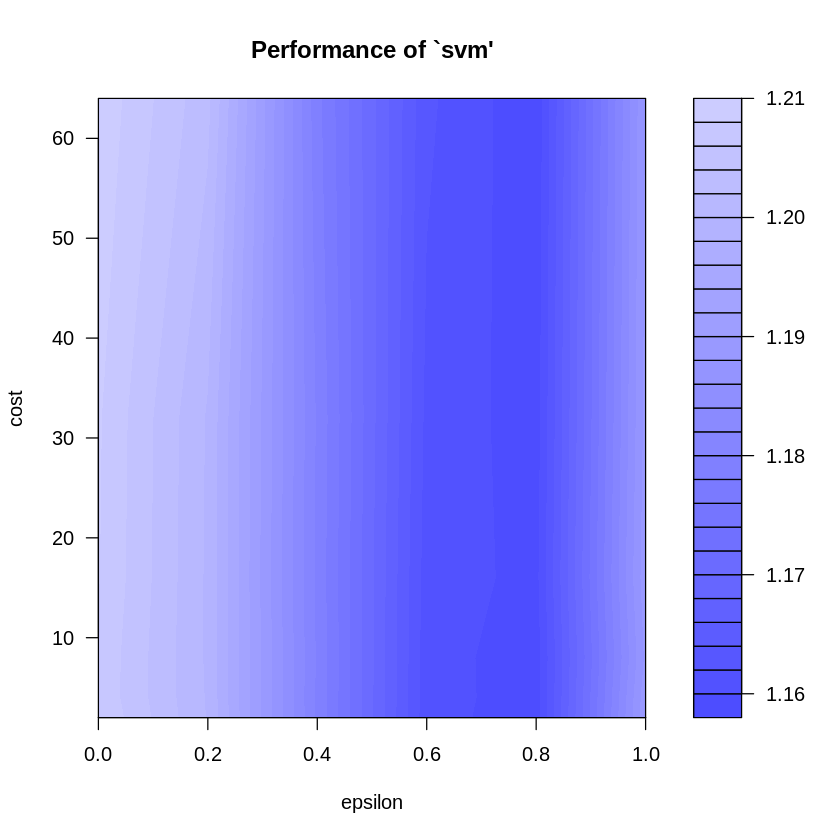

In [53]:
tune_results <- tune(svm, x_wend, y_wend, svm = "regression", kernel="linear",
                     ranges = list(epsilon = seq(0, 1, 0.2), cost = 2^(1:6)))

plot(tune_results)

In [54]:
svrl_model_wend <- tune_results$best.model
summary(svrl_model_wend)


Call:
best.tune(method = svm, train.x = x_wend, train.y = y_wend, ranges = list(epsilon = seq(0, 
    1, 0.2), cost = 2^(1:6)), svm = "regression", kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  64 
      gamma:  0.02380952 
    epsilon:  0.8 


Number of Support Vectors:  392






In [55]:
predictedY <- predict(svrl_model_wend, x=x_wend)
Y <- data_wend$Walc

evaluate_model(Y, predictedY, ncol(data_wend))

[1] "RMSE: 1.04351814746808"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1  80 267  48   3   0
         2  27 131  75   2   0
         3  11  91  91   7   0
         4   1  29  89  19   0
         5   0   7  37  29   0

Overall Statistics
                                          
               Accuracy : 0.3075          
                 95% CI : (0.2796, 0.3365)
    No Information Rate : 0.5029          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1045          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.67227   0.2495  0.26765  0.31667       NA
Specificity           0.65622   0.7996  0.84517  0.87907  0.93008
Pos Pred Value        0.20101   0.5574  0.45500  0.13768       NA
Neg Pred Value        0.93963   0.5130

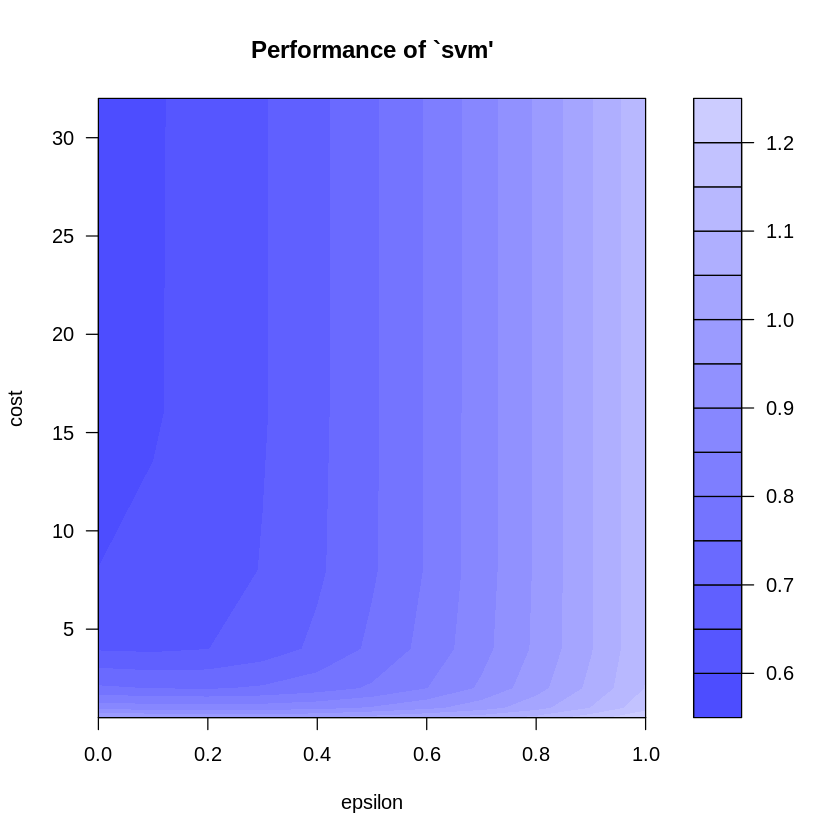

In [56]:
tune_results <- tune(svm, x_wend, y_wend, svm = "regression", kernel="radial",
                     ranges = list(epsilon = seq(0, 1.0, 0.1), cost = 2^(-1:5)))

plot(tune_results)

In [57]:
svrr_model_wend <- tune_results$best.model
summary(svrr_model_wend)


Call:
best.tune(method = svm, train.x = x_wend, train.y = y_wend, ranges = list(epsilon = seq(0, 
    1, 0.1), cost = 2^(-1:5)), svm = "regression", kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  32 
      gamma:  0.02380952 
    epsilon:  0 


Number of Support Vectors:  1041






In [58]:
predictedY <- predict(svrr_model_wend, x=x_wend)
Y <- data_wend$Walc

evaluate_model(Y, predictedY, ncol(data_wend))

[1] "RMSE: 0.00027409849676087"
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 398   0   0   0   0
         2   0 235   0   0   0
         3   0   0 200   0   0
         4   0   0   0 138   0
         5   0   0   0   0  73

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9965, 1)
    No Information Rate : 0.3812     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            1.0000   1.0000   1.0000   1.0000  1.00000
Specificity            1.0000   1.0000   1.0000   1.0000  1.00000
Pos Pred Value         1.0000   1.0000   1.0000   1.0000  1.00000
Neg Pred Value         1.0000   1.0000   1.0000   1.0000  1.00000
Prevalence    

# Wnioski


Podsumowując, należałoby ocenić, czy tak zbudowane modele posiadałyby jakąkolwiek użyteczną funkcjonalność w dzisiejszych czasach i wyciągnąć kilka wniosków:
* Wartości atrybutów klasy `Dalc` w udostępnionym zbiorze danych były mocno niezbalansowane. Spośród 1043 rekordów, jedynie po 26 posiadało wartość 4 lub 5, co miało duży wpływ na predykcje modeli regresji.
* Maszyny wektorów nośnych, choć realizujące w przeważającej liczbie przypadków zadania klasyfikacyjne, mogą z powodzeniem być wykorzystywane do budowy modelów regresorów.
* Stopień skomplikowania i pojemność modelu jest niezależna od liczby wymiarów danych.
* Model oparty na maszynie wektorów nośnych znajdowuje minimum globalne. Minimalizowana jest funkcja kwadratowa co gwarantuje znalezienie minimum. Algorytm jest bardzo wydajny i SVM generuje prawie optymalny regresor. Nie jest tez czuły na przetrenowanie.
* Trening modelu przebiega bardzo powoli, w szczególności trening modelu, którego jądro oparte jest o funkcje wielomianową i przy dużej ilości danych użytych do treningu.
* Dane zebrane w postaci anonimowych ankiet nie stanowią idealnej reprezentacji. Uczniowie mogli wypełniać je subiektywnie, przez co nie oddawały one rzeczywistości i nie pozwoliłyby na dobrej jakości predykcje.
* Cechy, jakimi posłużono się do opisu poszczególnych uczniów były niewystarczająco dokładne. Wiele atrybutów mogło przyjąć ograniczoną liczbę wartości w wąskim przedziale, co prowadziło do utraty informacji.
* Dodatkowo budowe modelu komplikował fakt, że niektóre z atrybutów, które wykraczały w rzeczywistości za minimalną lub maksymalną skale, w jakiej atrybuty były reprezentowane, zostały przycięte do tej skali.
* Dane dotyczą jedynie uczniów dwóch róznych liceów. Model ten nie posiada zastosowania do oszacowania spożycia alkoholu przez uczniów z innych regionów czy krajów.